In [1]:
import sys
sys.path.append('../../src/')

from TrafficLight import PeriodicTrafficLight, MemoryLessTrafficLight, AdaptiveTrafficLight, TrafficLightMirror
import Model1
import Model2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

In [2]:
output_path = '../../data/'

**Traffic lights**

In [3]:
adaptive_ew11 = AdaptiveTrafficLight()
adaptive_ew11.initialize(sensor_depth=8, rule=1)

adaptive_ns11 = TrafficLightMirror()
adaptive_ns11.initialize(traffic_light=adaptive_ew11)

adaptive_ew12 = AdaptiveTrafficLight()
adaptive_ew12.initialize(sensor_depth=8, rule=1)

adaptive_ns12 = TrafficLightMirror()
adaptive_ns12.initialize(traffic_light=adaptive_ew12)

adaptive_ew21 = AdaptiveTrafficLight()
adaptive_ew21.initialize(sensor_depth=8, rule=1)

adaptive_ns21 = TrafficLightMirror()
adaptive_ns21.initialize(traffic_light=adaptive_ew21)

adaptive_ew22 = AdaptiveTrafficLight()
adaptive_ew22.initialize(sensor_depth=8, rule=1)

adaptive_ns22 = TrafficLightMirror()
adaptive_ns22.initialize(traffic_light=adaptive_ew22)

**Intersection network**

*M/M/1 queue model*

The following intersection network consists of two four-way intersections in a 2x2 grid, each 15 m wide and 150 m apart. Each vehicle moves 14 m/s (50.4 km/h) at full speed.

In [4]:
network_1 = Model1.IntersectionNetworkSimulator()
network_1.initialize(grid_dimensions=(2,2), grid_distance=150)
network_1.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=2, arrival_rate_e=lambda t: 1/3, arrival_rate_s=lambda t: 1/4, arrival_rate_w=lambda t: 1/3, platoon_size_distribution=[0.5,0.5])
network_1.set_queue_rate_parameters(grid_ind=(0,1), avg_departure_time=2, arrival_rate_s=lambda t: 1/4, arrival_rate_w=lambda t: 1/3, platoon_size_distribution=[0.5,0.5])
network_1.set_queue_rate_parameters(grid_ind=(1,0), avg_departure_time=2, arrival_rate_n=lambda t: 0.1+0.001*t, arrival_rate_e=lambda t: 1/3, platoon_size_distribution=[0.5,0.5])
network_1.set_queue_rate_parameters(grid_ind=(1,1), avg_departure_time=2, arrival_rate_n=lambda t: 0.1+0.001*t, arrival_rate_w=lambda t: 1/3, platoon_size_distribution=[0.5,0.5])
network_1.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=adaptive_ns11, traffic_light_ew=adaptive_ew11)
network_1.set_traffic_lights(grid_ind=(0,1), traffic_light_ns=adaptive_ns12, traffic_light_ew=adaptive_ew12)
network_1.set_traffic_lights(grid_ind=(1,0), traffic_light_ns=adaptive_ns21, traffic_light_ew=adaptive_ew21)
network_1.set_traffic_lights(grid_ind=(1,1), traffic_light_ns=adaptive_ns22, traffic_light_ew=adaptive_ew22)
network_1.set_observable_intersections(grid_inds=network_1.grid_inds)

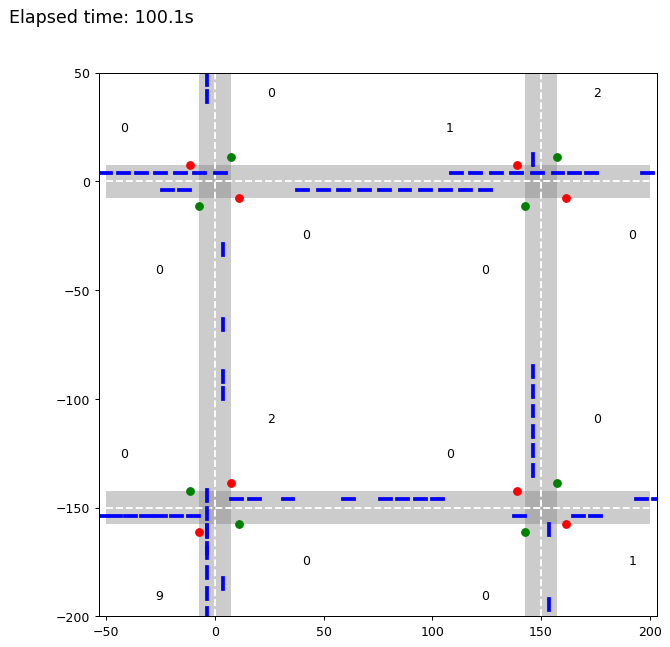

In [5]:
network_1.simulate(delta_t=0.1, end_time=100, animate=True, fig_width=8, output_destination="../../data/vids/", file_name="simulation_2x2.mp4", speed=1)

View the video below.